In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
data = pd.read_csv('CollegeScorecard.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns ## Total 1725 columnsd

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'AccredAgency', 'INSTURL', 'NPCURL',
       ...
       'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP',
       'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=1725)

## Columns Selection

In [5]:
## Here are the columns we select to proceed with our mission
## school identities,UNITID: College IDs,INSTNM: College names
## Cost of schools: TUITFTE: Tuition revenue, INEXPFTE: instructional expenditure, AVGFACSAL: average faculty salary
## Admission: ADM_RATE_ALL :Overall admission rate
## Cost of students: COSTT4_A:annual cost of attendance includes tuition and fees, books and supplies, and living expenses
##                   ,TUITIONFEE_IN: tuition for in-state students,TUITIONFEE_OUT: tuition for out-state students
## student body: UGDS: number of undergraduate students, UGDS for different ethnic groups
## Financial Aid: PCTFLOAN: percentage of students receive financial aid, DEBT_MDN:Cumulative Median Debt
## Completion: C150_4:complete within 150 percent of the expected time
## Earning: Most of columns are NAs, so decide not to use this section
## Repayment: Repayment Rate on Federal Student Loans 3 years after leaving school
columns=['UNITID','INSTNM','TUITFTE','INEXPFTE','AVGFACSAL','ADM_RATE_ALL','COSTT4_A',
        'TUITIONFEE_IN','TUITIONFEE_OUT','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
         'UGDS_ASIAN','UGDS_AIAN','PCTFLOAN','DEBT_MDN','C150_4','RPY_3YR_RT']
univ = data[columns]
univ

,UNITID,INSTNM,TUITFTE,INEXPFTE,AVGFACSAL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,PCTFLOAN,DEBT_MDN,C150_4,RPY_3YR_RT
0,100654,Alabama A & M University,9063.0,7459.0,7079.0,0.8989,18888.0,7182.0,12774.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.8204,19500,0.2914,0.44471387
1,100663,University of Alabama at Birmingham,9033.0,17208.0,10170.0,0.8673,19990.0,7206.0,16398.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.5397,16250,0.5377,0.756266667
2,100690,Amridge University,12057.0,5123.0,3849.0,NaN,12300.0,6870.0,6870.0,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.7629,10500,0.6667,0.647249191
3,100706,University of Alabama in Huntsville,8322.0,9352.0,9341.0,0.8062,20306.0,9192.0,21506.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.4728,16500,0.4835,0.781997919
4,100724,Alabama State University,7813.0,7393.0,6557.0,0.5125,17400.0,8720.0,15656.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.8735,15854.5,0.2517,0.331198862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,Georgia Military College-Columbus Campus,NaN,NaN,NaN,NaN,NaN,6276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076,NaN,0.480910918
7800,48285704,Georgia Military College-Valdosta Campus,NaN,NaN,NaN,NaN,NaN,5271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076,NaN,0.480910918
7801,48285705,Georgia Military College-Warner Robins Campus,NaN,NaN,NaN,NaN,NaN,5148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076,NaN,0.480910918
7802,48285706,Georgia Military College-Online,NaN,NaN,NaN,NaN,NaN,6900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076,NaN,0.480910918


## Data Cleaning

In [6]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          7804 non-null   int64  
 1   INSTNM          7804 non-null   object 
 2   TUITFTE         7362 non-null   float64
 3   INEXPFTE        7362 non-null   float64
 4   AVGFACSAL       4654 non-null   float64
 5   ADM_RATE_ALL    2484 non-null   float64
 6   COSTT4_A        4137 non-null   float64
 7   TUITIONFEE_IN   4415 non-null   float64
 8   TUITIONFEE_OUT  4196 non-null   float64
 9   UGDS            7090 non-null   float64
 10  UGDS_WHITE      7090 non-null   float64
 11  UGDS_BLACK      7090 non-null   float64
 12  UGDS_HISP       7090 non-null   float64
 13  UGDS_ASIAN      7090 non-null   float64
 14  UGDS_AIAN       7090 non-null   float64
 15  PCTFLOAN        7063 non-null   float64
 16  DEBT_MDN        7094 non-null   object 
 17  C150_4          2448 non-null   f

In [7]:
print(univ.isnull().sum()) ## Missing values per column
## Over 2/3 of the values in ADM_RATE_ALL and C150_4 are missing value, while about 1/2 of the values 
## in AVGFACSAL, COST4_A, TUITIONFEE_IN, and TUITIONFEE_OUT are missing values. 

UNITID               0
INSTNM               0
TUITFTE            442
INEXPFTE           442
AVGFACSAL         3150
ADM_RATE_ALL      5320
COSTT4_A          3667
TUITIONFEE_IN     3389
TUITIONFEE_OUT    3608
UGDS               714
UGDS_WHITE         714
UGDS_BLACK         714
UGDS_HISP          714
UGDS_ASIAN         714
UGDS_AIAN          714
PCTFLOAN           741
DEBT_MDN           710
C150_4            5356
RPY_3YR_RT         985
dtype: int64


In [8]:
## We decide to remove ADM_RATE_ALL column
columns=['UNITID','INSTNM','TUITFTE','INEXPFTE','AVGFACSAL','COSTT4_A',
        'TUITIONFEE_IN','TUITIONFEE_OUT','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
         'UGDS_ASIAN','UGDS_AIAN','PCTFLOAN','DEBT_MDN','C150_4','RPY_3YR_RT']
univ = data[columns]

In [9]:
print(univ.isnull().sum())  ## Missing values per row

UNITID               0
INSTNM               0
TUITFTE            442
INEXPFTE           442
AVGFACSAL         3150
COSTT4_A          3667
TUITIONFEE_IN     3389
TUITIONFEE_OUT    3608
UGDS               714
UGDS_WHITE         714
UGDS_BLACK         714
UGDS_HISP          714
UGDS_ASIAN         714
UGDS_AIAN          714
PCTFLOAN           741
DEBT_MDN           710
C150_4            5356
RPY_3YR_RT         985
dtype: int64


In [10]:
## Remove all NAs in the datafram 
univ.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
univ.info() ## Final dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 7371
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          2272 non-null   int64  
 1   INSTNM          2272 non-null   object 
 2   TUITFTE         2272 non-null   float64
 3   INEXPFTE        2272 non-null   float64
 4   AVGFACSAL       2272 non-null   float64
 5   COSTT4_A        2272 non-null   float64
 6   TUITIONFEE_IN   2272 non-null   float64
 7   TUITIONFEE_OUT  2272 non-null   float64
 8   UGDS            2272 non-null   float64
 9   UGDS_WHITE      2272 non-null   float64
 10  UGDS_BLACK      2272 non-null   float64
 11  UGDS_HISP       2272 non-null   float64
 12  UGDS_ASIAN      2272 non-null   float64
 13  UGDS_AIAN       2272 non-null   float64
 14  PCTFLOAN        2272 non-null   float64
 15  DEBT_MDN        2272 non-null   object 
 16  C150_4          2272 non-null   float64
 17  RPY_3YR_RT      2272 non-null   o

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
univ['DEBT_MDN'].unique() ## There is one string value

array([19500. , 16250. , 10500. , 16500. , 15854.5, 17750. , 10750. ,
       18250. , 21500. ,  8050. ,  9500. , 18750. , 12000. , 16850. ,
       14250. , 13500. , 12908.5, 22500. , 15872. , 12542. , 22000. ,
       20000. , 15000. , 20500. , 19414.5, 19000. , 23687.5, 11336.5,
       11247. , 11750. , 19250. ,  6338.5, 16750. , 17636. , 12136.5,
       11644. ,  9934. , 14656.5, 18532. , 19874.5, 13136.5, 14990. ,
       13698.5, 13300. , 10043. ,  8250. , 11864. , 10828. ,  7848. ,
       19801.5, 10443. , 17900. , 12349.5, 10000. ,  8240. , 31000. ,
       19688. , 28250. , 12667. , 24500. , 17500. , 11000. , 14000. ,
       16431. , 15703.5, 14889.5, 14191. , 14500. , 12900.5, 12500. ,
       14494. , 12000.5, 14480. , 13626.5, 15500. , 15200. , 17000. ,
       18463. , 27000. , 18112. , 11806. , 19598.5, 23166. , 22509. ,
       25222. , 16802. , 25000. , 22326. , 13000. , 22218. , 22750. ,
       15750. , 20201.5, 19125. ,  6334. , 14094. , 30833. , 20900. ,
       26500. , 1725

In [13]:
univ = univ[univ.DEBT_MDN != 'PrivacySuppressed'] ## drop string value
univ['DEBT_MDN'] = univ.DEBT_MDN.astype(float) ## Convert Object to float
univ = univ[univ.RPY_3YR_RT != 'PrivacySuppressed'] ## drop string value
univ['RPY_3YR_RT'] = univ.RPY_3YR_RT.astype(float) ## Convert Object to float

/Users/zhangzhixuan/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


## K-Means

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [34]:
## Use all numerical columns
df = univ[['TUITFTE','INEXPFTE','AVGFACSAL','COSTT4_A',
        'TUITIONFEE_IN','TUITIONFEE_OUT','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
         'UGDS_ASIAN','UGDS_AIAN','PCTFLOAN','DEBT_MDN','C150_4','RPY_3YR_RT']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 7371
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TUITFTE         2180 non-null   float64
 1   INEXPFTE        2180 non-null   float64
 2   AVGFACSAL       2180 non-null   float64
 3   COSTT4_A        2180 non-null   float64
 4   TUITIONFEE_IN   2180 non-null   float64
 5   TUITIONFEE_OUT  2180 non-null   float64
 6   UGDS            2180 non-null   float64
 7   UGDS_WHITE      2180 non-null   float64
 8   UGDS_BLACK      2180 non-null   float64
 9   UGDS_HISP       2180 non-null   float64
 10  UGDS_ASIAN      2180 non-null   float64
 11  UGDS_AIAN       2180 non-null   float64
 12  PCTFLOAN        2180 non-null   float64
 13  DEBT_MDN        2180 non-null   float64
 14  C150_4          2180 non-null   float64
 15  RPY_3YR_RT      2180 non-null   float64
dtypes: float64(16)
memory usage: 289.5 KB


In [35]:
## Standardize 
scaler = StandardScaler()
df = scaler.fit_transform(df)

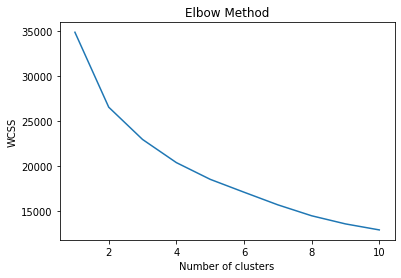

In [36]:
## Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
## Silhouette Method
for i in range(10):
    kmeans1 = KMeans(n_clusters=(i+2)).fit(df1)
    print(silhouette_score(df1,kmeans1.labels_),'-',i+2,' Clusters','\n')

0.2423979157697083 - 2  Clusters 

0.21485509962675134 - 3  Clusters 

0.20313614124405435 - 4  Clusters 

0.22047673211101843 - 5  Clusters 

0.22456289118556017 - 6  Clusters 

0.22754903375058733 - 7  Clusters 

0.230832102668694 - 8  Clusters 

0.20680547005410357 - 9  Clusters 

0.18164284306006775 - 10  Clusters 

0.19513388562883002 - 11  Clusters 



In [41]:
## Both elbow method and silhouette method indicate that 
## k=2 (2 clusters) is better.

In [53]:
## assign labels to each cluster
kmeans = KMeans(n_clusters=2).fit(df)
univ['lable'] = kmeans.labels_.astype(float) ## add labels to dataframe
univ.groupby('lable').mean() # Check mean values of all columns for each cluster

,UNITID,TUITFTE,INEXPFTE,AVGFACSAL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,PCTFLOAN,DEBT_MDN,C150_4,RPY_3YR_RT
lable,,,,,,,,,,,,,,,,,
0.0,232611.948087,10326.067623,5986.777322,5854.183060,23429.902322,12693.556011,16101.484973,4553.008880,0.514535,0.204164,0.128411,0.024384,0.010103,0.644942,14663.823770,0.388336,0.628605
1.0,186978.452514,17790.185754,12878.421788,8167.402235,43040.565642,31177.048883,32981.438547,4257.578212,0.636581,0.074649,0.089107,0.057435,0.004420,0.607940,20394.289804,0.654116,0.875011


In [55]:
## school identities,UNITID: College IDs,INSTNM: College names
## Cost of schools: TUITFTE: Tuition revenue, INEXPFTE: instructional expenditure, AVGFACSAL: average faculty salary
## Cost of students: COSTT4_A:annual cost of attendance includes tuition and fees, books and supplies, and living expenses
##                   ,TUITIONFEE_IN: tuition for in-state students,TUITIONFEE_OUT: tuition for out-state students
## student body: UGDS: number of undergraduate students, UGDS for different ethnic groups
## Financial Aid: PCTFLOAN: percentage of students receive financial aid, DEBT_MDN:Cumulative Median Debt
## Completion: C150_4:complete within 150 percent of the expected time
## Earning: Most of columns are NAs, so decide not to use this section
## Repayment: Repayment Rate on Federal Student Loans 3 years after leaving school

### Discussion

### Between cluster0 and cluster1, we can see higher expenditure on cost of schools section in terms of tuition revenue, instructional expenditure, and average falculty salary. Similar situation happen to the cost of students section, the annual cost of college inclusive for cluster1 is almost doubled compare to cluster0. Tuitions for in-state and out-state students in cluster1 is also much higher than cluster0. For student body columns, we can see a larger propotion of white and asian students in cluster1 while a larger propotion of black and hispanic students in cluster0. In term of financial aid, the percentage of students receive financial aid for these two clusters are pretty close, it shows that more than 60% of students in these univercities receive financial aid. But the cumulative median debt for cluster1 is only 6000 USD more than cluster0, which is not that dramatic compare to the difference in cost of student section. The completion rate for cluster1 is 0.654 compare to 0.388 in cluster0. The repayment rate on Federal student loads 3 years after leaving school for cluster0 is 0.629 and cluster1 is 0.875. 

In [65]:
## Take a look at universities in each cluster
univ[univ['lable']==0].INSTNM

0                  Alabama A & M University
1       University of Alabama at Birmingham
2                        Amridge University
3       University of Alabama in Huntsville
4                  Alabama State University
                       ...                 
7367              DeVry University-Virginia
7368            DeVry University-Washington
7369             DeVry University-Wisconsin
7370            University of North Georgia
7371            South Georgia State College
Name: INSTNM, Length: 1464, dtype: object

In [66]:
univ[univ['lable']==1].INSTNM

9                          Auburn University
10               Birmingham Southern College
46                        Samford University
51                       Spring Hill College
64                 Alaska Pacific University
                        ...                 
5779         University of California-Merced
5813                      Neumont University
5814    Johnson & Wales University-Charlotte
5931     Expression College for Digital Arts
6680                          Unitek College
Name: INSTNM, Length: 716, dtype: object